In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
#no of features and dataset
mnist.data.shape

(70000, 784)

In [5]:
# 10 digits from 0 to 9
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
mnist.target[0]

'5'

In [10]:
mnist.data=mnist.data.to_numpy()

In [11]:
type(mnist.data)

numpy.ndarray

In [12]:
mnist.data[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

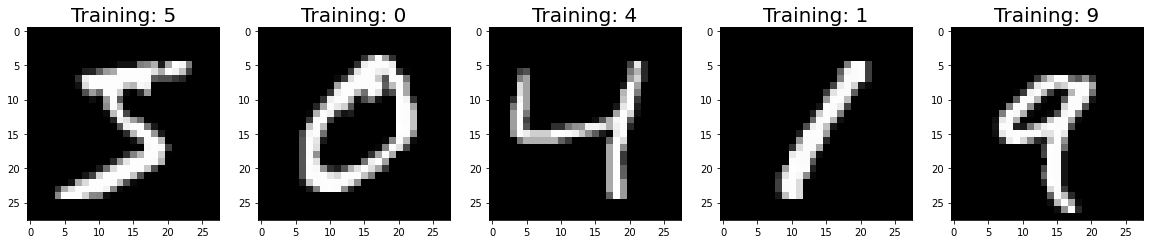

In [14]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[:5],mnist.target[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap='gray')
    plt.title('Training: ' + label, fontsize = 20);

In [15]:
X_train,X_test,y_train,y_test=train_test_split(mnist.data,mnist.target,test_size=0.2)

In [17]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)
prediction=model.predict(X_test)
score=model.score(X_test,y_test)
print(score)

C:\Users\Dell\anaconda3\envs\Recognizing Handwritten Digits\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9190714285714285


In [19]:
model.predict([X_test[0]])

array(['8'], dtype=object)

prediction :8


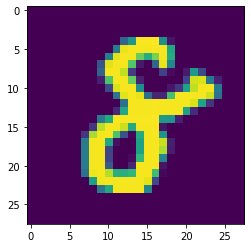

In [20]:
index=0
plt.imshow(np.reshape(X_test[index],(28,28)))
print('prediction :' +model.predict([X_test[index]])[0])

prediction :7


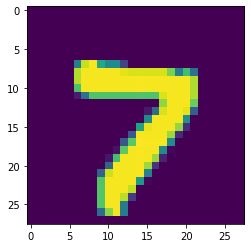

In [24]:
index=100
plt.imshow(np.reshape(X_test[index],(28,28)))
print('prediction :' +model.predict([X_test[index]])[0])

In [27]:
cm = metrics.confusion_matrix(y_test,prediction)
cm

array([[1352,    0,    3,    6,    2,   12,   10,    3,    8,    0],
       [   1, 1551,    6,    3,    2,    3,    2,    4,    8,    4],
       [   3,   14, 1243,   27,   13,   10,   16,   14,   35,    8],
       [   7,    6,   26, 1245,    4,   54,    3,   20,   30,   10],
       [   7,    4,    7,    2, 1287,    3,   14,    8,   12,   44],
       [  14,    5,   13,   52,   11, 1070,   22,    2,   48,   15],
       [   5,    3,   14,    0,   13,   19, 1326,    1,    6,    1],
       [   5,    5,   16,   10,   13,    3,    1, 1312,    3,   42],
       [  15,   24,   16,   42,    5,   42,   17,    2, 1180,   17],
       [   6,    7,    1,   14,   37,    5,    0,   48,   15, 1301]],
      dtype=int64)

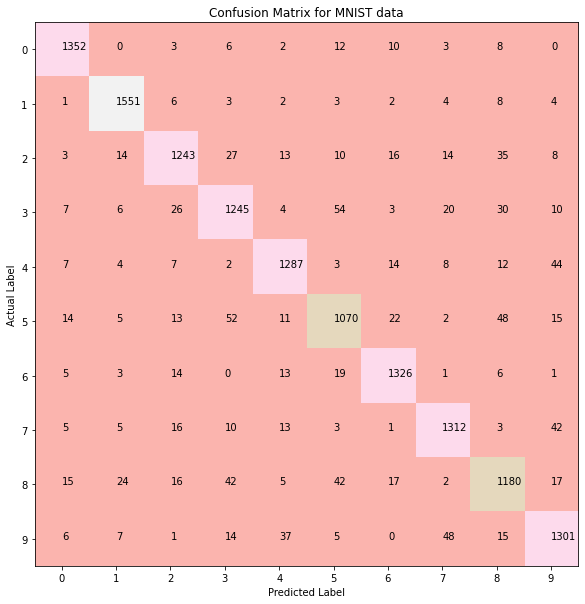

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(cm,cmap='Pastel1')
plt.title('Confusion Matrix for MNIST data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x))